x = 3.1512195371492355
y = 0.06353138627153587
F(3.1512, 0.0635) = -183.8702


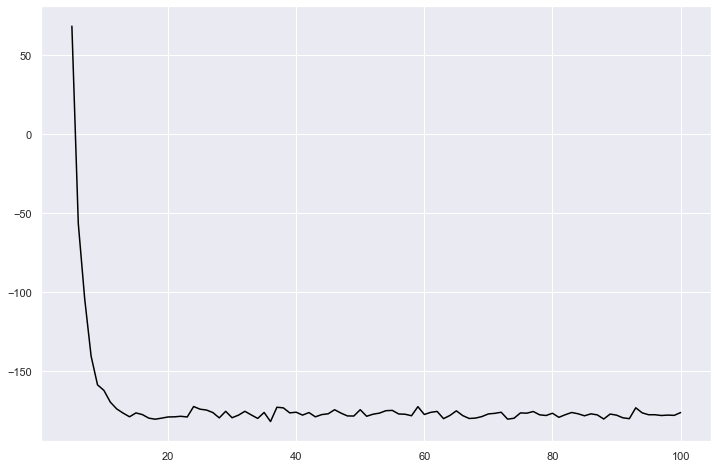

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from genetic_algorithm import GeneticAlgorithm
from matplotlib.animation import FuncAnimation

sns.set()

def func(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2 + np.cos(x + y) * 100 + np.cos( - x + y) * 100

G = GeneticAlgorithm(func, population_size = 100, GenLimit = 100, tournament_size = 4)
G.run()

best_x = G.population[0].x
best_y = G.population[0].y
best_fitness = G.population[0].FF()

print(f'x = {best_x}')
print(f'y = {best_y}')
print(f'F({best_x:.4f}, {best_y:.4f}) = {best_fitness:.4f}')

start = 5
stop = len(G.history['fitness_function'])
step = 1

fig = plt.figure(figsize=(12,8))
graph0 = plt.plot([i for i in range(start, stop, step)], G.history['fitness_function'][start:stop:step], color = 'black')
grid1 = plt.grid(True)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


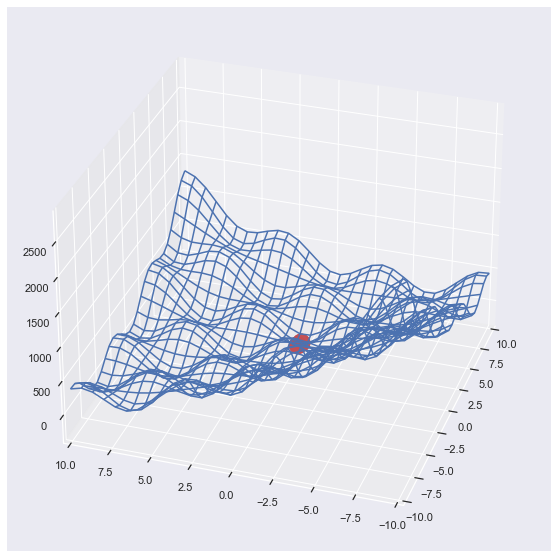

In [36]:

bound = 10
x = np.linspace(-bound, bound, 30)
y = np.linspace(-bound, bound, 30)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
ax.plot_wireframe(X, Y, Z, cmap='plasma_r')

def animate(i):
    top_ten_chromosome = G.history['chromosomes'][i]
    zs = [func(X, Y) for X, Y in top_ten_chromosome]
    xs, ys = zip(*top_ten_chromosome)
    
    ax.view_init(30, i*2)

    graph._offsets3d = (xs, ys, zs)
    return graph

plt.xlim((-bound, bound))
plt.ylim((-bound, bound))


top_ten_chromosome = G.history['chromosomes'][10]
zs = [func(x, y) for x,y in top_ten_chromosome]
xs, ys = zip(*top_ten_chromosome)
graph = ax.scatter(xs, ys, zs, marker='o', s=300, c = 'r')

    
my_animation = FuncAnimation(fig, animate, interval=100)
my_animation.save('screenshots/animation.gif', writer='imagemagick')